# Census QR data study

We apply our proposed TAVIE algorithm to analyze the U.S. 2000 Census data. Particularly, state-level Census 2000 data
containing individual records of the characteristics for a $5\%$ sample of people and housing units has been taken into account.
The log of annual salary is treated as the response with demographic characteristics (gender, age, race, marital status and
education level) of people with $40$ or more weeks of work in the previous year and $35$ or more hours per week of work,
constitutes the set of primary features. The resultant size of the design matrix is n = $5 \times 10^6$ by $p = 11$.

We also consider comparing TAVIE quantile regression results with Fast QR as developed in <http://proceedings.mlr.press/v28/yang13f.pdf> on the Census dataset.

In [81]:
# Required imports
import numpy as np
from TAVIE import TAVIE_QR
import pandas as pd
import rdata
import rich
from sklearn.preprocessing import scale
from IPython.display import display, Latex
import matplotlib.pyplot as plt

### Reading the U.S. 2000 Census data, <http://www.census.gov/census2000/PUMS5.html>

In [85]:
# reading census data
dataset = rdata.read_rds("data/Census_data/census.RData")
X = pd.DataFrame(dataset['census_X'])
y = pd.DataFrame(dataset['census_y'])

# sampling 1e6 data points
X_sample = X.sample(n=1000000, random_state=42)
y_sample = y.loc[X_sample.index]
X_sample = X_sample.reset_index(drop=True)
y_sample = y_sample.reset_index(drop=True)

# converting it to numpy nd array
X_sample = X_sample.to_numpy()
y_sample = y_sample.to_numpy().ravel()

/opt/anaconda3/lib/python3.13/site-packages/rdata/parser/_parser.py:1208: UserWarning: Wrong extension .rds for file in RDATA format
  warnings.warn(  # noqa: B028


### Intializing the TAVIE QR model and running on the Census data to obtain TAVIE estimates

In [86]:
# Initialize the TAVIE_QR model
QR_model = TAVIE_QR(fit_intercept=False) # intercept already added in the X_sample design matrix

# Fitting the quantile regression using TAVIE_QR
# -------------------------------------------------------------------
# assume X_sample is shape (N, p) and y_sample is shape (N,)
# if you have feature names from before:
# feature_names = list(X.columns)
# otherwise, auto-generate names:
p = X_sample.shape[1]
feature_names = ["Intercept", "Female", "Age30", "Age40", "Age50", "Age60", "Age70", "NonWhite", "Married", "Education", "Education2"]
# -------------------------------------------------------------------

# set up quantiles and storage arrays
quantiles = np.arange(0.05, 0.95 + 1e-8, 0.05)
q = len(quantiles)

# to store the TAVIE estimates and ELBO
TAVIE_mus    = {}
TAVIE_sigmas = {}
ELBO = {}

# loop over quantiles
from tqdm import tqdm
for u in tqdm(quantiles, desc="Fitting quantiles"):
    print(f"Fitting quantile u = {u:.2f}")
    QR_model.fit(X_sample, y_sample, quantile=u, maxiter = 10000, verbose=True) # fit the TAVIE_QR model
    TAVIE_mus[u] = QR_model.get_TAVIE_means(verbose=False) # get the TAVIE estimates
    variational_estimates  = QR_model.get_variational_estimates() # getting the variational estimates
    TAVIE_sigmas[u] = variational_estimates['V_xi']
    ELBO[u] = QR_model.get_elbo()
    print("----------#########---------")

Fitting quantiles:   0%|                                 | 0/19 [00:00<?, ?it/s]

Fitting quantile u = 0.05


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:   5%|█▎                      | 1/19 [01:55<34:41, 115.65s/it]

Converged in 335 iterations.
----------#########---------
Fitting quantile u = 0.10


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  11%|██▌                     | 2/19 [03:24<28:20, 100.03s/it]

Converged in 282 iterations.
----------#########---------
Fitting quantile u = 0.15


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  16%|███▉                     | 3/19 [04:56<25:39, 96.23s/it]

Converged in 288 iterations.
----------#########---------
Fitting quantile u = 0.20


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  21%|█████▎                   | 4/19 [06:20<22:50, 91.36s/it]

Converged in 256 iterations.
----------#########---------
Fitting quantile u = 0.25


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  26%|██████▌                  | 5/19 [07:37<20:08, 86.32s/it]

Converged in 239 iterations.
----------#########---------
Fitting quantile u = 0.30


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  32%|███████▉                 | 6/19 [08:53<17:54, 82.66s/it]

Converged in 234 iterations.
----------#########---------
Fitting quantile u = 0.35


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  37%|█████████▏               | 7/19 [09:57<15:21, 76.78s/it]

Converged in 206 iterations.
----------#########---------
Fitting quantile u = 0.40


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  42%|██████████▌              | 8/19 [11:12<13:56, 76.00s/it]

Converged in 227 iterations.
----------#########---------
Fitting quantile u = 0.45


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  47%|███████████▊             | 9/19 [12:50<13:48, 82.83s/it]

Converged in 301 iterations.
----------#########---------
Fitting quantile u = 0.50


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  53%|████████████▋           | 10/19 [14:13<12:27, 83.05s/it]

Converged in 261 iterations.
----------#########---------
Fitting quantile u = 0.55


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  58%|█████████████▉          | 11/19 [15:26<10:39, 79.90s/it]

Converged in 239 iterations.
----------#########---------
Fitting quantile u = 0.60


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  63%|███████████████▏        | 12/19 [16:41<09:09, 78.49s/it]

Converged in 234 iterations.
----------#########---------
Fitting quantile u = 0.65


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  68%|████████████████▍       | 13/19 [17:54<07:41, 76.84s/it]

Converged in 221 iterations.
----------#########---------
Fitting quantile u = 0.70


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  74%|█████████████████▋      | 14/19 [19:07<06:18, 75.72s/it]

Converged in 235 iterations.
----------#########---------
Fitting quantile u = 0.75


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  79%|██████████████████▉     | 15/19 [20:14<04:51, 72.94s/it]

Converged in 223 iterations.
----------#########---------
Fitting quantile u = 0.80


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  84%|████████████████████▏   | 16/19 [21:35<03:45, 75.30s/it]

Converged in 261 iterations.
----------#########---------
Fitting quantile u = 0.85


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  89%|█████████████████████▍  | 17/19 [23:01<02:37, 78.52s/it]

Converged in 269 iterations.
----------#########---------
Fitting quantile u = 0.90


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles:  95%|██████████████████████▋ | 18/19 [24:44<01:26, 86.09s/it]

Converged in 309 iterations.
----------#########---------
Fitting quantile u = 0.95


╭─ TAVIE Fit for Quantile Regression ─╮
│  Starting TAVIE fit!                │
╰─────────────────────────────────────╯

Fitting quantiles: 100%|████████████████████████| 19/19 [26:51<00:00, 84.84s/it]

Converged in 379 iterations.
----------#########---------


### Storing the TAVIE results

In [96]:
# Storing the results

# required import
import xarray as xr

# — assume you’ve already run your loop and populated:
#     TAVIE_mus    : dict mapping quantile → length-p numpy array of μ
#     TAVIE_sigmas : dict mapping quantile → (p×p) numpy covariance array
#
# and you have:
#     feature_names  : list of length p
#     quantiles      : 1D array of length q

# Build the mus DataFrame with row/col names
quantile_labels = [f"Quantile{u:.2f}" for u in quantiles]
mus_df = pd.DataFrame(
    data = np.column_stack([TAVIE_mus[u] for u in quantiles]),
    index = feature_names,
    columns = quantile_labels
)

# Stack the covariances into a (p × p × q) array
Sigmas_array = np.stack([TAVIE_sigmas[u] for u in quantiles], axis=2)

# Wrap that as an xarray DataArray to get named dims & coords
Sigmas_da = xr.DataArray(
    data   = Sigmas_array,
    dims   = ("row_var", "col_var", "quantile"),
    coords = {
      "row_var":   feature_names,
      "col_var":   feature_names,
      "quantile":  quantile_labels
    }
)

# Storing the ELBO history
ELBO_series = pd.Series(
    data  = [ELBO[u] for u in quantiles],
    index = quantile_labels,
    name  = "ELBO"
)

# compute 95% CIs and store as additional DataFrames
ses        = np.sqrt(np.diagonal(Sigmas_array, axis1=0, axis2=1)).T
lower_df   = mus_df - 1.96 * ses
upper_df   = mus_df + 1.96 * ses
lower_df.columns = upper_df.columns = quantile_labels
lower_df.index   = upper_df.index   = feature_names

# 5) Bundle into one results dict
census_tavie_results = {
    "quantiles":   quantiles,
    "mus":         mus_df,
    "Sigmas":      Sigmas_da,
    "lower_CI":    lower_df,
    "upper_CI":    upper_df,
    "ELBO":        ELBO_series
}

# Now:
# • census_tavie_results["mus"]   is a (p×q) DataFrame
# • census_tavie_results["Sigmas"] is a p×p×q DataArray with dimnames
# • census_tavie_results["lower_CI"/"upper_CI"] are your 95% bounds
# • ELBO:    length-q Series of the ELBO per quantile

# storing the census_tavie_results
import pickle

with open("census_tavie_results_Python.pkl", "wb") as f:
    pickle.dump(census_tavie_results, f)

### Reading the FAST QR results

In [89]:
# reading the original results for FAST QR
mus_original = rdata.read_rds("data/Census_data/census_original_results.RData")
mus_original = np.array(mus_original['census_original_results']['x.opt'])

order = [1, 0] + list(range(2, 11))
mus_original = mus_original[order, :]

/opt/anaconda3/lib/python3.13/site-packages/rdata/parser/_parser.py:1208: UserWarning: Wrong extension .rds for file in RDATA format
  warnings.warn(  # noqa: B028


### Plotting the TAVIE QR estimates along with 95% CIs across all quantiles and variables

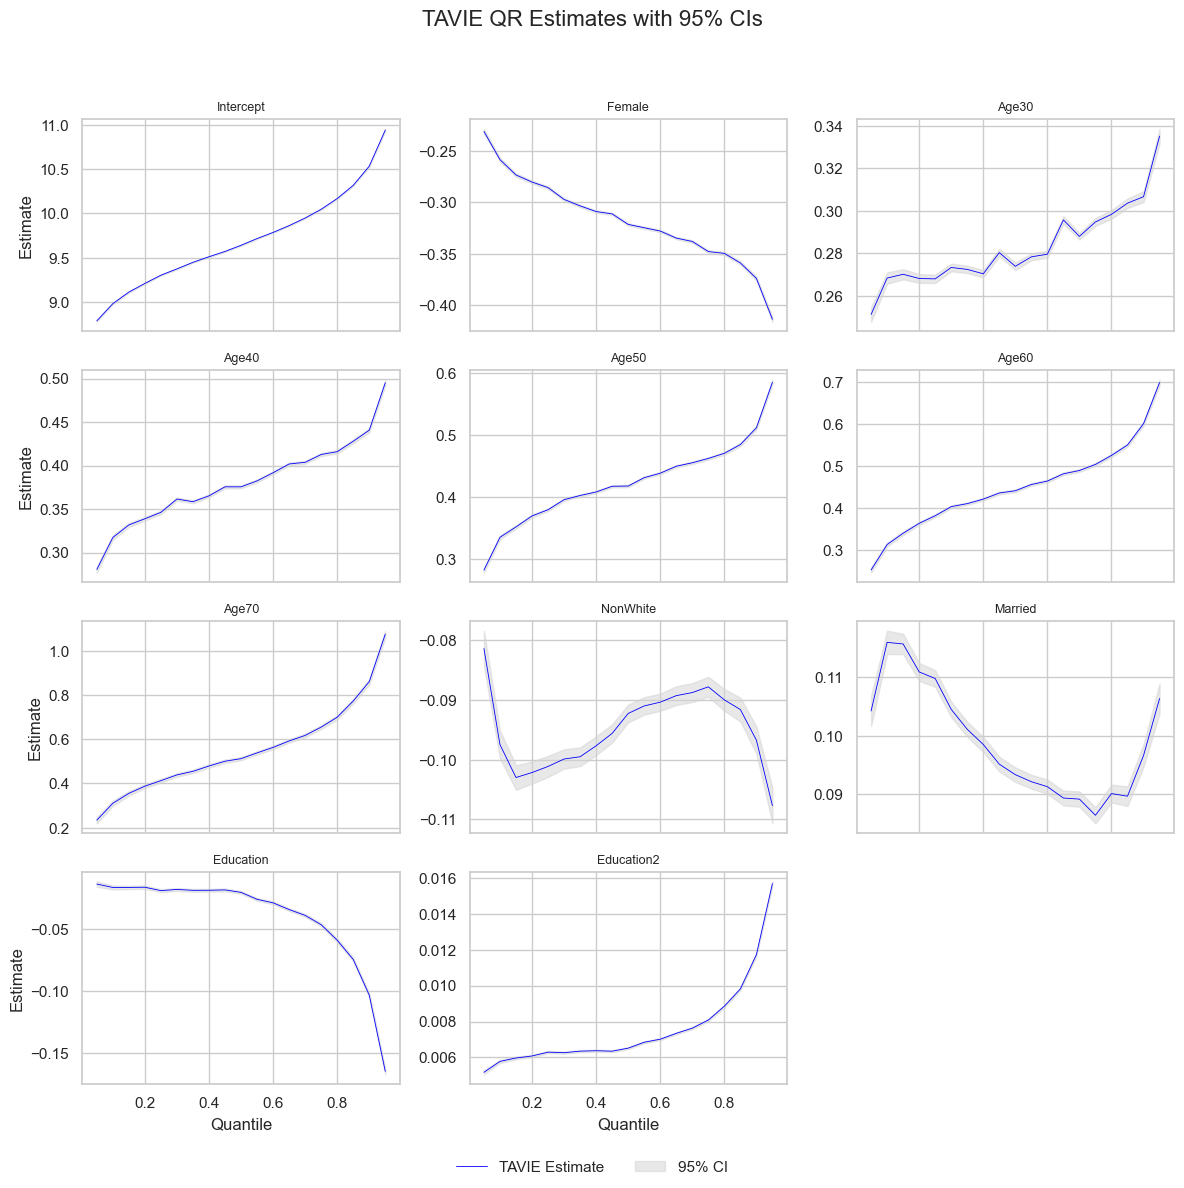

In [105]:
# ─── Re-derive feature names and quantile values ─────────────
features   = mus_df.index.tolist()
quant_vals = [float(col.replace("Quantile","")) for col in mus_df.columns]

# STATIC FIGURE with legend
cols = 3
rows = (len(features) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3), sharex=True)
axes = axes.flatten()

for idx, feat in enumerate(features):
    ax = axes[idx]
    # plot estimate line with label only for the first subplot
    ax.plot(
        quant_vals,
        mus_df.loc[feat].values,
        color="blue",
        linewidth=0.6,
        label="TAVIE Estimate" if idx == 0 else None
    )
    # shade CI band with label only once
    ax.fill_between(
        quant_vals,
        lower_df.loc[feat].values,
        upper_df.loc[feat].values,
        color="lightgray",
        alpha=0.5,
        label="95% CI" if idx == 0 else None
    )
    ax.set_title(feat, fontsize=9)
    if idx % cols == 0:
        ax.set_ylabel("Estimate")
    if idx // cols == rows - 1:
        ax.set_xlabel("Quantile")

# turn off unused axes
for ax in axes[len(features):]:
    ax.axis("off")

# common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, frameon=False)
fig.suptitle("TAVIE QR Estimates with 95% CIs", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Plotting the FAST QR and TAVIE QR results (estimates) for comparison

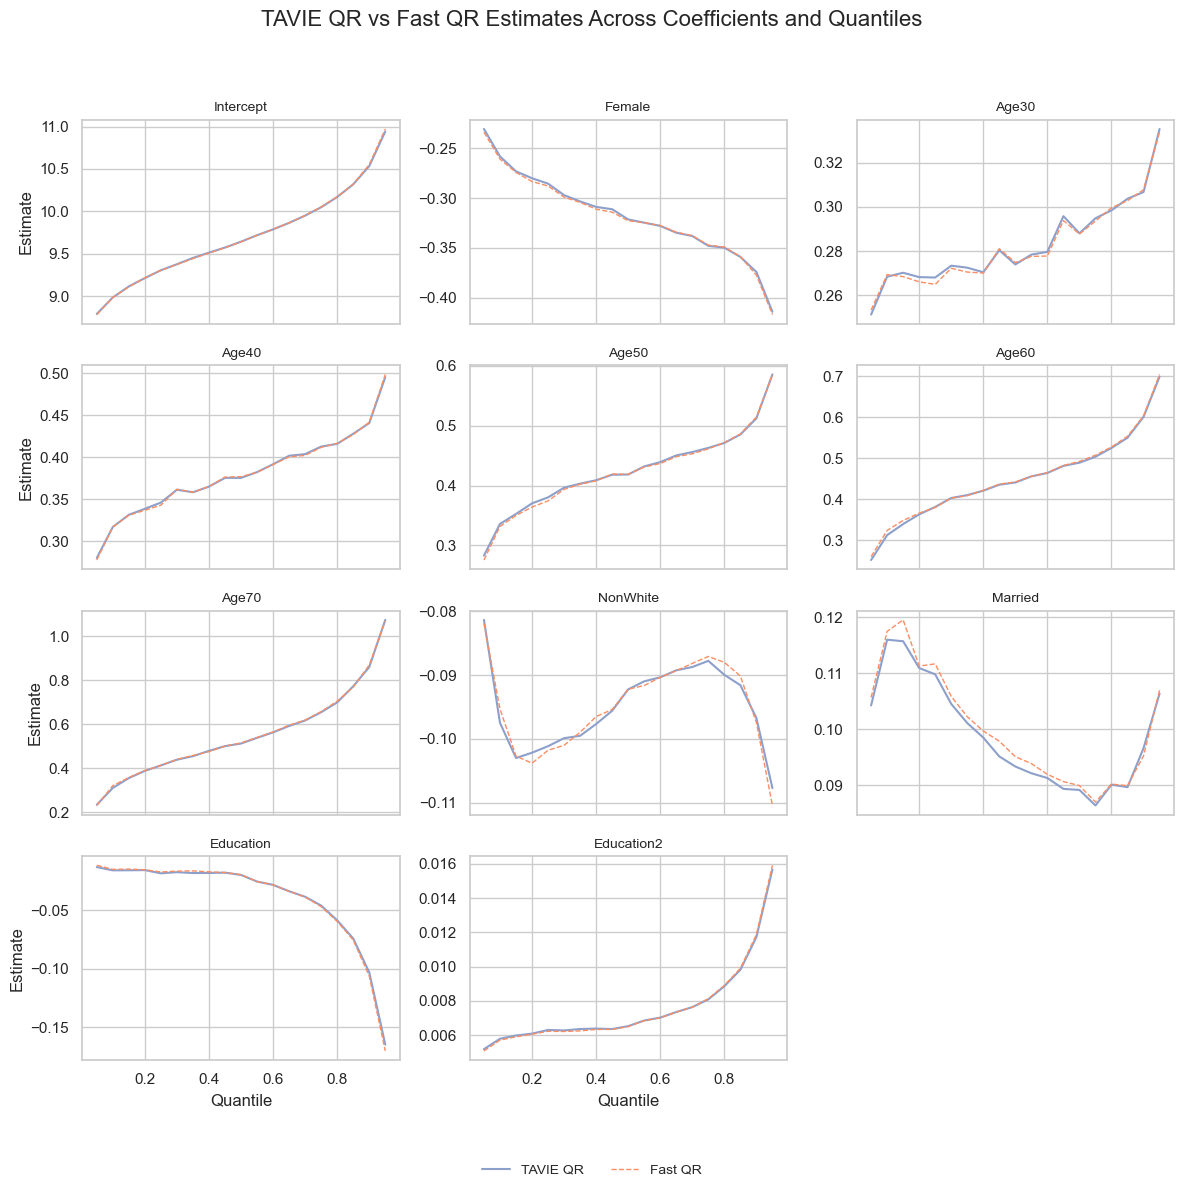

In [112]:
# required import

import seaborn as sns

# ─────────────────────────────────────────────────────────────
# Assumes you have in your workspace:
#   • mus_df        : DataFrame (p×q) of TAVIE means
#   • mus_original  : NumPy array (p×q) of Fast-QR means
#   • features      : list of p feature names (mus_df.index.tolist())
#   • quantiles     : array of q quantile levels
# ─────────────────────────────────────────────────────────────

# Rebuild Fast-QR DataFrame
quantile_labels = mus_df.columns.tolist()
fastqr_df = pd.DataFrame(
    data    = mus_original,
    index   = features,
    columns = quantile_labels
)
quant_vals = [float(lbl.replace("Quantile","")) for lbl in quantile_labels]

# Set up seaborn theme and colors
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2", 5)
tavie_color, fastqr_color = palette[2], palette[1]

# ───── STATIC COMPARISON PLOT ────────────────────────────────
cols = 3
rows = (len(features) + cols - 1) // cols
fig_static, axes_static = plt.subplots(rows, cols, figsize=(cols*4, rows*3), sharex=True, sharey=False)
axes_static = axes_static.flatten()

for i, feat in enumerate(features):
    ax = axes_static[i]
    t_vals = mus_df.loc[feat].values
    f_vals = fastqr_df.loc[feat].values

    ax.plot(quant_vals, t_vals, color=tavie_color, linewidth=1.5, label="TAVIE QR")
    ax.plot(quant_vals, f_vals, color=fastqr_color, linestyle="--", linewidth=1.0, label="Fast QR")
    ymin, ymax = t_vals.min(), t_vals.max()
    y2min, y2max = f_vals.min(), f_vals.max()
    pad = 0.05 * (max(ymax, y2max) - min(ymin, y2min))
    ax.set_ylim(min(ymin, y2min)-pad, max(ymax, y2max)+pad)

    ax.set_title(feat, fontsize=10)
    if i % cols == 0:
        ax.set_ylabel("Estimate")
    if i // cols == rows - 1:
        ax.set_xlabel("Quantile")

for ax in axes_static[len(features):]:
    ax.axis("off")

handles, labels = axes_static[0].get_legend_handles_labels()
fig_static.legend(handles, labels, loc="lower center", ncol=2, frameon=False, fontsize=10)
fig_static.suptitle("TAVIE QR vs Fast QR Estimates Across Coefficients and Quantiles", fontsize=16)
plt.tight_layout(rect=[0,0.05,1,0.95])
plt.show()

### The L2-error between the TAVIE QR and FAST QR estimates over all the quantiles

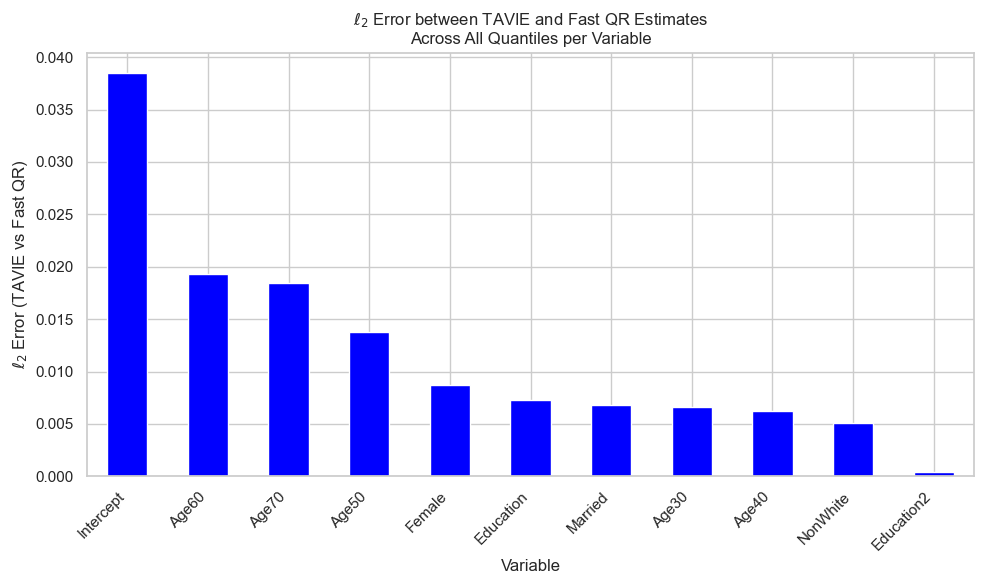

In [92]:
# plotting the L2-error between the TAVIE and Fast QR estimates across all variables for different quantiles

# Compute L2 error across quantiles for each variable
diff = mus_df.values - fastqr_df.values
l2_errors = np.linalg.norm(diff, axis=1)  # axis=1 over quantile dimension
error_series = pd.Series(l2_errors, index=mus_df.index, name="L2 Error")

# Plot a bar chart of errors
plt.figure(figsize=(10, 6))
error_series.sort_values(ascending=False).plot(
    kind='bar',
    color='blue'
)
plt.ylabel(f"$\ell_2$ Error (TAVIE vs Fast QR)")
plt.xlabel("Variable")
plt.title(f"$\ell_2$ Error between TAVIE and Fast QR Estimates\nAcross All Quantiles per Variable")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
